# Introduction to Linear Models and Scikit-Learn <a href="https://colab.research.google.com/github/burakai/ENGR4450/blob/main/4_support-vector-machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Linear Regression

Linear regression is a statistical method to model the relationship between a dependent variable $y$ and one or more independent variables $X$.
The model assumes that the dependent variable is a linear combination of the input features plus some error $\epsilon$.

Mathematically, for a single feature:
$$
y = \beta_0 + \beta_1 x + \epsilon
$$

For multiple features, it generalizes to:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon
$$
where:
- $y$ is the target variable (what we want to predict),
- $x_1, x_2, \dots, x_p$ are the input features,
- $\beta_0, \beta_1, \dots, \beta_p$ are the coefficients (parameters) to be learned, and
- $\epsilon$ is the error term (residual).

**Assumptions**

1. **Linearity**: The relationship between the independent and dependent variables is linear.
2. **Independence**: The observations are independent of each other.
3. **Homoscedasticity**: Constant variance of the error terms across all levels of the independent variables.
4. **Normality of Errors**: The error terms should be normally distributed.

The objective of linear regression is to find the coefficients $\beta$ that minimize the residual sum of squares (RSS):
$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$
where $y_i$ is the true value and $\hat{y_i}$ is the predicted value for observation $i$.


Linear regression is often viewed as one of the simplest and most essential concepts in statistics, to the extent that some argue it doesn't qualify as machine learning. Nonetheless, it serves as an excellent introduction to supervised learning. Many advanced learning techniques covered in this course will, in some manner, build on the principles of linear regression. At its core, linear regression aims to determine the optimal linear combination of inputs that best explains the output.

**Ordinary Least Squares (OLS)**

The most common method to estimate the coefficients is **Ordinary Least Squares (OLS)**, which minimizes the sum of squared differences between the observed and predicted values.
The OLS solution can be expressed in matrix form:
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$
where $X$ is the matrix of input features and $y$ is the target vector.



<div style="max-width:800px; margin-left: auto; margin-right: auto;">
    
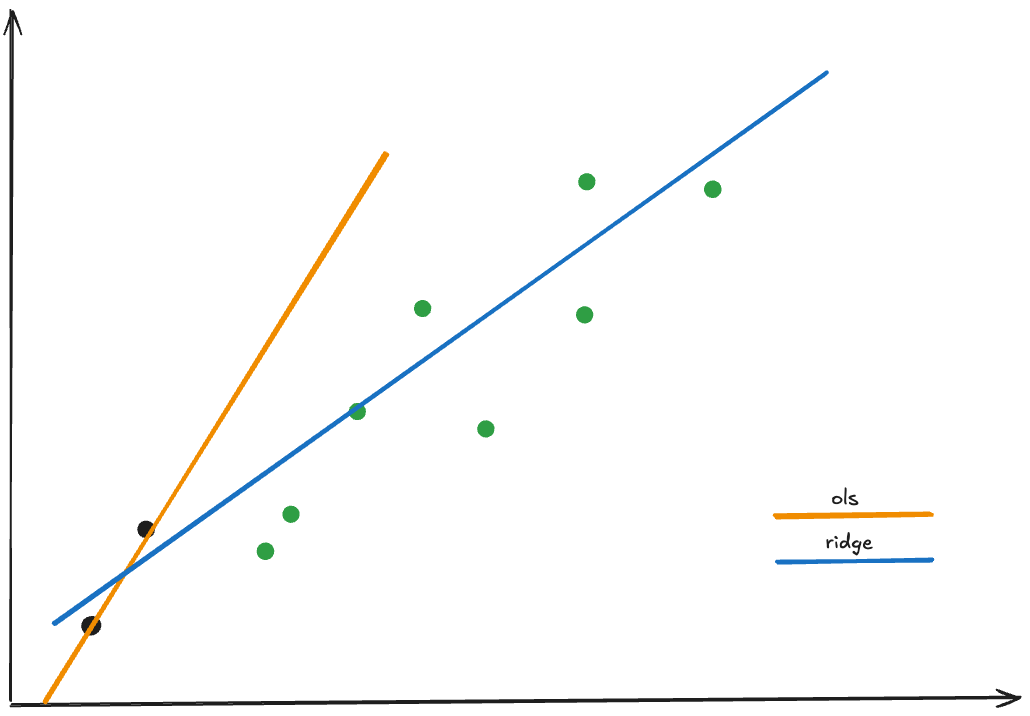
    
</div>


**Ridge Regression (L2 Regularization)**

Ridge regression adds a penalty term to the OLS objective to prevent overfitting. The penalty is proportional to the square of the coefficients, which helps to keep them small.
The objective function for ridge regression is:
$$
L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$
where $\lambda$ is the regularization parameter controlling the strength of the penalty.

**Lasso Regression (L1 Regularization)**

Lasso regression uses an L1 penalty instead of L2, which can shrink some coefficients to zero, effectively performing feature selection. The objective function is:
$$
L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

**Applications**

Linear models are widely used in various fields such as economics, biology, and social sciences due to their simplicity and interpretability. Some common applications include:
- Predicting housing prices based on features like size, location, and age.
- Modeling the relationship between advertising spend and sales revenue.
- Forecasting stock prices based on historical trends.

**Limitations**

- **Linearity Assumption**: Linear models may underperform when the true relationship between the features and the target is non-linear.
- **Sensitivity to Outliers**: Linear regression is sensitive to outliers, which can disproportionately affect the model.
- **Multicollinearity**: When the independent variables are highly correlated, it can lead to unreliable coefficient estimates.

Linear models are a fundamental tool in machine learning. They offer simplicity, interpretability, and efficiency but may struggle in capturing complex relationships.

Regularization techniques like Ridge and Lasso are often used to improve model performance and prevent overfitting in practical scenarios.

---

## Scikit-learn Basics

Scikit-learn is one of the most popular and widely used machine learning libraries in Python. It provides simple and efficient tools for data analysis and modeling, covering a wide variety of machine learning algorithms. 

Scikit-learn is built on top of key Python libraries such as NumPy, SciPy, and Matplotlib, making it highly efficient and easy to integrate with other scientific computing tools in Python.

### Key Features of Scikit-learn
- **Classification**: Identifying which category an object belongs to (e.g., spam detection, image recognition).
- **Regression**: Predicting a continuous value (e.g., predicting house prices).
- **Clustering**: Grouping similar objects together (e.g., customer segmentation).
- **Dimensionality Reduction**: Reducing the number of features in the dataset (e.g., Principal Component Analysis).
- **Model Selection**: Tuning model parameters and evaluating model performance.
- **Preprocessing**: Cleaning and preparing data (e.g., scaling, encoding categorical variables).

Scikit-learn is designed to be simple and consistent, which is achieved by following a unified interface across all models. This means that most machine learning models in scikit-learn share the same set of methods, namely `fit()`, `predict()`, and `score()`.

### Core Methods: `fit()`, `predict()`, and `score()`

#### `fit()` Method

The `fit()` method is used to train a machine learning model using the training data. It adjusts the model's parameters to fit the input data. This method is essential in any supervised learning task (like classification or regression), where the model needs to learn from the given data to make predictions.

`X_train`: The training data (features), typically an array or a DataFrame where each row represents a sample and each column represents a feature.

`y_train`: The target values (labels) corresponding to the training data, used to teach the model the correct output.


>```python
>from sklearn.linear_model import LinearRegression
>
># Creating a linear regression model
>model = LinearRegression()
>
># Fitting the model to the training data
>model.fit(X_train, y_train)
>```

The model learns the relationship between the input features in X_train and the target values in y_train.

#### `predict()` Method

Once the model has been trained (after calling `fit()`), you can use the `predict()` method to make predictions on new, unseen data. This method takes in the input features and outputs the model’s prediction for each sample.

`X_test`: The test data (features) for which the model makes predictions.

> ```python
> predictions = model.predict(X_test)
> ```

#### `score()` Method

The `score()` method is used to evaluate the performance of the model. It returns a single score that measures how well the model performed on the test data.

In classification tasks, this is usually the accuracy (fraction of correctly predicted labels), while in regression tasks, it typically returns the coefficient of determination ($R^2$ score).

`y_test`: The actual target values corresponding to X_test for comparison with predicted values.

> ```python
> score = model.score(X_test, y_test)
> ```

For classification tasks, `score()` returns the accuracy:
$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

For regression tasks, `score()` returns the $R^2$ score:
$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$
where $y_i$ are the true values, $\hat{y}_i$ are the predicted values, and $\bar{y}$ is the mean of the true values.

**Summary of the Methods**

- `fit()`: Trains the model using training data.
- `predict()`: Makes predictions using the trained model on new data.
- `score()`: Evaluates the model’s performance using test data.

### Working with Datasets in Scikit-learn

Scikit-learn provides several functions to load datasets, including built-in toy datasets, real-world datasets, and functions to generate synthetic data. In this section, we will focus on **built-in datasets**.

**List of Dataset Loading Functions**

Scikit-learn offers several key functions for loading datasets, which can be broadly categorized as:
1. **Toy Datasets (Built-in)**: Small datasets that come bundled with scikit-learn.
1. **Real-World Datasets (Ready to Download)**: Some real-world datasets are not built-in due to their sizes and can be downloaded when it's necessary.
1. **Synthetic Datasets (Generated)**: Datasets that can be created programmatically for testing purposes.
1. **External Datasets**: Downloaded data from external sources can be loaded to use in scikit-learn.

To access the built-in datasets in scikit-learn, you can use the `datasets` module:

> ```python
> from sklearn import datasets
> ```


Below is an overview of using built-in toy datasets.

For more details, please visit the official scikit-learn documentation. [documentation](https://scikit-learn.org/stable/datasets.html).

**Built-in Toy Datasets**

These are small, commonly used datasets, already included with scikit-learn. They are perfect for learning and quick experimentation.

1. **`load_iris()`**
   - **Description**: Iris flower dataset for classification.
   - **Features**: 4 features (sepal length, sepal width, petal length, petal width).
   - **Target**: 3 species of iris (Setosa, Versicolor, Virginica).

2. **`load_wine()`**
   - **Description**: Wine dataset for classification.
   - **Features**: 13 chemical analysis features of wines.
   - **Target**: 3 classes of wine.

3. **`load_breast_cancer()`**
   - **Description**: Breast cancer dataset for binary classification (malignant vs. benign tumors).
   - **Features**: 30 features (mean radius, texture, perimeter, area, etc.).

4. **`load_digits()`**
   - **Description**: Handwritten digit dataset for classification.
   - **Features**: 64 features (8x8 pixel images of digits).
   - **Target**: 10 classes (digits 0 through 9).

5. **`load_diabetes()`**
   - **Description**: Diabetes dataset for regression tasks.
   - **Features**: 10 baseline variables (age, sex, BMI, etc.).
   - **Target**: A quantitative measure of disease progression.

6. **`load_linnerud()`**
   - **Description**: Multivariate regression dataset (physiological and exercise data).
   - **Features**: 3 exercise features (chins, sit-ups, jumps).
   - **Target**: 3 physiological measurements (weight, waist, pulse).

~~**`load_boston()`**~~ **(DEPRECATED)**

~~The Boston housing dataset, used for regression tasks, has been removed due to ethical concerns.~~

<br>

**Dataset Structure**

Each built-in dataset in scikit-learn comes as a Bunch object, which behaves like a dictionary. The main attributes are:

- data: The feature matrix (input variables).
- target: The target labels (output).
- feature_names: Names of the features (if available).
- target_names: Names of the target classes (if available).
- DESCR: A description of the dataset.

For example, in the Iris dataset:

- iris.data: The features (measurements of sepals and petals).
- iris.target: The species labels (0: setosa, 1: versicolor, 2: virginica).
- iris.feature_names: [‘sepal length’, ‘sepal width’, ‘petal length’, ‘petal width’].
- iris.target_names: [‘setosa’, ‘versicolor’, ‘virginica’].

In [63]:
from sklearn import datasets

# Load the Iris dataset
print(f"Iris dataset:\n")
iris = datasets.load_iris()

# Explore the dataset
print(f"Features: {iris.feature_names}\n")
print(f"Target classes: {iris.target_names}\n")
print(f"Shape of data: {iris.data.shape}\n")
print(f"First 5 rows of data:\n{iris.data[:5]}")

Iris dataset:

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes: ['setosa' 'versicolor' 'virginica']

Shape of data: (150, 4)

First 5 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [50]:
# Load the Wine dataset
print(f"Wine dataset:\n")
wine = datasets.load_wine()

# Check the dataset details
print(f"Wine feature names: {wine.feature_names}\n")
print(f"Wine target classes: {wine.target_names}")

Wine dataset:

Wine feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Wine target classes: ['class_0' 'class_1' 'class_2']


**Summary of Common Built-in Datasets**

| **Dataset**       | **Function**             | **Task Type**      | **Features**                              | **Targets**                        |
|-------------------|--------------------------|--------------------|-------------------------------------------|------------------------------------|
| **Iris**          | `load_iris()`            | Classification     | 4 features (sepal/petal measurements)     | 3 species of iris                 |
| **Wine**          | `load_wine()`            | Classification     | 13 features (chemical properties)         | 3 classes of wine                 |
| **Breast Cancer** | `load_breast_cancer()`   | Classification     | 30 features (cell nuclei measurements)    | Malignant/Benign                  |
| **Digits**        | `load_digits()`          | Classification     | 64 features (8x8 pixel image of digits)   | Digits (0-9)                      |
| **Diabetes**      | `load_diabetes()`        | Regression         | 10 baseline features (age, BMI, etc.)     | Quantitative disease progression  |
| **Linnerud**      | `load_linnerud()`        | Multivariate Regression | 3 exercise features (chins, sit-ups, jumps) | 3 physiological measures (weight, waist, pulse) |

After all, built-in datasets in scikit-learn provide a convenient starting point for experimenting with machine learning models.

You can easily load and explore these datasets using the `datasets` module, which contains various popular datasets suitable for both classification and regression tasks. 

We should also apply a **train-test split** before using these datasets to properly evaluate model performance. This ensures that our models are tested on unseen data, which helps in assessing how well they generalize to new examples.

---

### *Example 1: Lineer Regression*

Let’s put some of the knowledge you've learnt so far and apply the following steps:


- **Import** necessary *libraries*.
- Create a *very* **simple** dataset using `numpy.array`.
- **Choose** the *model* (`LinearRegression`).

<br>

- **Train** (`fit`) the model.
- **Make predictions** using `predict`.
- **Calculate default score** for our model using `score`.

<br>

- Print the metrics including **slope** and **bias**.
- **Visualize** the given data and fitted line.

Predictions: [1.1  1.95 2.8  3.65 4.5 ]
R2 Score: 0.9897260273972602
Coefficient (slope): 0.85
Intercept (bias): 0.25


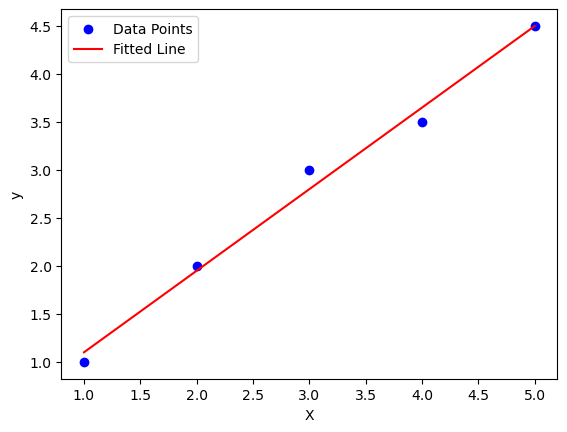

In [95]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a simple dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 3.5, 4.5])

# Create a linear regression model
model = LinearRegression()

# Fit the model using the input X and the target y
model.fit(X, y)

# Make predictions using the same input values
predictions = model.predict(X)
score = model.score(X, y)
print(f"Predictions: {predictions}")
print(f"R2 Score: {score}")

# Print the coefficient (slope) and intercept (bias)
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept (bias): {model.intercept_:.2f}")

# Import the necessary libraries

# Plot the data points and the linear fit
plt.scatter(X, y, color='blue', label='Data Points')  # Original data points
plt.plot(X, predictions, color='red', label='Fitted Line')  # Fitted line

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In the previous example, we used the entire dataset  `X`  and  `y`  to calculate the  $R^2$  score, which measures the model’s fit.

**However**, _in real-world scenarios_, it’s important to avoid overfitting by not evaluating the model on the same data used for training.

Instead, techniques like **train-test split** or **cross-validation** should be used.

These methods ensure that the model’s performance is evaluated on unseen data, providing a more reliable estimate of how well the model will generalize to new, real-world data.

---

### Splitting Data Using `train_test_split`

In machine learning, it is crucial to evaluate how well a model performs on unseen data. If we train a model on the entire dataset and test it on the same data, the model’s performance will likely be overly optimistic. To avoid this, we split the dataset into two parts:
1. **Training set**: Used to train the model.
2. **Test set**: Used to evaluate the model's performance on unseen data.

The `train_test_split` function from **scikit-learn** is commonly used for this purpose. It splits the dataset into random train and test subsets. By separating the data in this way, we can assess the generalization ability of the model.

> ```python
> from sklearn.model_selection import train_test_split
> 
> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
> ```

**Variables**
- `X`: Input features (data).
- `y`: Target labels (output).
- `X_train`: Subset of features used to train the model.
- `X_test`: Subset of features used to test the model.
- `y_train`: Target values corresponding to X_train.
- `y_test`: Target values corresponding to X_test.

**Parameters**

- `test_size`: Proportion of the dataset to include in the test split. For example, test_size=0.2 means 20% of the data will be used for testing and 80% for training.
- `train_size`: Proportion of the dataset to include in the training split. If not specified, it is automatically set to the complement of test_size (i.e., 1 - test_size).
- `random_state`: Controls the shuffling of the data before splitting. Setting random_state to an integer (e.g., random_state=42) ensures reproducibility—i.e., the same split will occur every time the code is run. This is useful for consistent results.
- `shuffle`: Whether or not to shuffle the data before splitting. It is set to True by default to avoid bias from the order of the data in the dataset.

**Why Do We Need `train_test_split`?**

1.	Avoid Overfitting: Training a model on the entire dataset and evaluating it on the same data can lead to overfitting—the model learns the noise in the training data and performs poorly on new data. By testing on unseen data (the test set), we get a better idea of how the model generalizes to new inputs.
2.	Estimate Model Performance: The test set serves as a proxy for how the model will perform in real-world applications. Without a test set, we wouldn’t know if the model performs well on unseen data.
3.	Reproducibility: By setting the random_state parameter, we ensure that the results are reproducible. This is especially important when comparing different models or tuning parameters.

Choosing the test_size

The choice of test_size depends on the size of your dataset:

- **For small datasets**, a typical test size is 20% (test_size=0.2).
- **For larger datasets**, you might choose a smaller test size (e.g., 10% or 5%) because you already have plenty of data to train the model.

In some cases, *if you have limited data*, you might need **cross-validation techniques (like k-fold cross-validation)** to make the most of your data.

As a conclusion, `train_test_split` is a simple yet essential function in the machine learning workflow.

By splitting the data into training and test sets, we ensure that the model is evaluated properly and that it generalizes well to unseen data.

---

### *Example 2: Linear Regression with Train-Test Split*

Let’s put all the knowledge together this time and apply what we’ve learnt so far! We’ll follow the steps below:

- Load a built-in dataset (Diabetes dataset).
- Apply train-test split.
- Train a linear regression model.
- Visualize the regression line and evaluate the model performance.

We'll use the diabetes dataset in the following example which is one of the built-in datasets available in `scikit-learn`.

It contains 10 baseline variables (features) and a target variable representing disease progression after one year. The dataset can be used to build regression models for predicting disease progression.

1. **Age**: Age of the patient
2. **Sex**: Gender of the patient
3. **BMI**: Body Mass Index
4. **BP**: Average blood pressure
5. **S1**: T-C level (total cholesterol)
6. **S2**: LDL (low-density lipoproteins)
7. **S3**: HDL (high-density lipoproteins)
8. **S4**: TCH (total cholesterol/HDL ratio)
9. **S5**: LTG (log of serum triglycerides level)
10. **S6**: GLU (blood sugar level)

**Target:** A quantitative measure of diabetes disease progression one year after baseline.

You can load the dataset using the `load_diabetes()` function in `scikit-learn`.

>```python
>from sklearn.datasets import load_diabetes
>diabetes = load_diabetes()
>```

**Used Libraries**
- matplotlib.pyplot: Used to plot graphs and visualize data.
- numpy: A library for numerical computations and array manipulations.
- sklearn.datasets.load_diabetes: Loads the diabetes dataset.
- sklearn.linear_model.LinearRegression: Used to create a linear regression model.
- sklearn.model_selection.train_test_split: Splits the dataset into training and testing subsets.

**Load Dataset**
- load_diabetes() loads the diabetes dataset, which includes 10 numerical features related to diabetes progression.
- diabetes.feature_names prints the feature names: [‘age’, ‘sex’, ‘bmi’, ‘bp’, ‘s1’, ‘s2’, ‘s3’, ‘s4’, ‘s5’, ‘s6’].

**Train-Test Split**
- The dataset is split into training (X_train, y_train) and testing (X_test, y_test) sets.
- test_size=0.2: 20% of the data is used for testing, while the remaining 80% is used for training.
- random_state=42 ensures reproducibility.

**Selecting the feature (BMI)**

`X_train[:, np.newaxis, 2]`: This slices the training data to only keep the BMI feature.
- `[:, 2]` selects the 3rd column (index 2 because Python uses 0-based indexing) from X_train, assuming BMI is stored in this column.
- `np.newaxis` reshapes this column into a 2D array with a single feature. Without it, X_train would be a 1D array, but models expect a 2D array where rows represent samples and columns represent features.
- The same operation is applied to `X_test` to extract **BMI** for the test set.

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of X_train: (353, 10)
Shape of y_train: (353,)
Shape of X_test: (89, 10)
Shape of y_test: (89,)


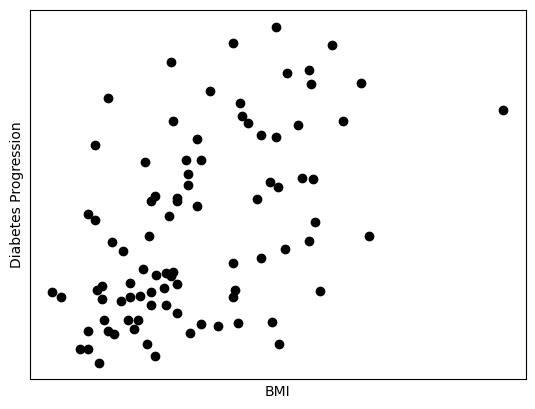

In [125]:
# Code source: Burak KILIC 
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()
print(diabetes.feature_names)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

#Use only one feature (BMI)
X_train = X_train[:, np.newaxis, 2]
X_test = X_test[:, np.newaxis, 2]

#Visualize the data
plt.scatter(X_test, y_test, color="black")
plt.xticks(())
plt.yticks(())
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.show()

- After selecting the BMI feature, the linear regression model is created using `LinearRegression()` as usual.

- The model is then trained on the training data (`X_train` and `y_train`) by fitting the BMI values to the target variable.

- Once trained, the model predicts the target values for the test set (`X_test`).

- The performance of the model is evaluated using the R-squared score, which indicates how well the model fits the test data.

- Finally, the results are visualized by plotting the actual vs. predicted values along with the regression line.

Shape of X_train: (353, 1)
Shape of y_train: (353,)
Shape of X_test: (89, 1)
Shape of y_test: (89,)

R2 Score: 0.23335039815872138


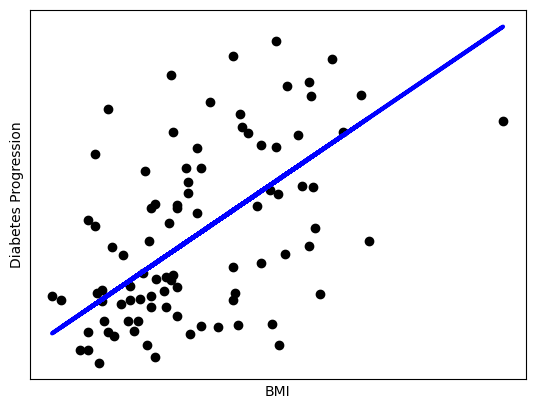

In [126]:
# Check the shape of the data after reshaping
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
predictions = model.predict(X_test)

score = model.score(X_test, y_test)
print(f"\nR2 Score: {score}")

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, predictions, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.show()

In the example above, we fit the data using only **one** feature.

But what if we want to use more than one feature? In other words, *what if we want to perform multiple regression?*

It’s very straightforward to do in scikit-learn. Instead of selecting just one feature, you can use multiple features by keeping the original dataset with all the relevant columns.

In the next example, you'll see how easy multiple regression is.

---

### *Example 3: Fitting a Linear Regression Model to Multi-Feature Data (a.k.a Multiple Linear Regression)*

Coefficients: 
 [  19.92730105 -262.5526422   509.19584695  336.09319329 -849.30479304
  480.22664735  120.69064852  236.72228404  716.61278802   70.41001991]
R2 Score: 0.5514200923362629


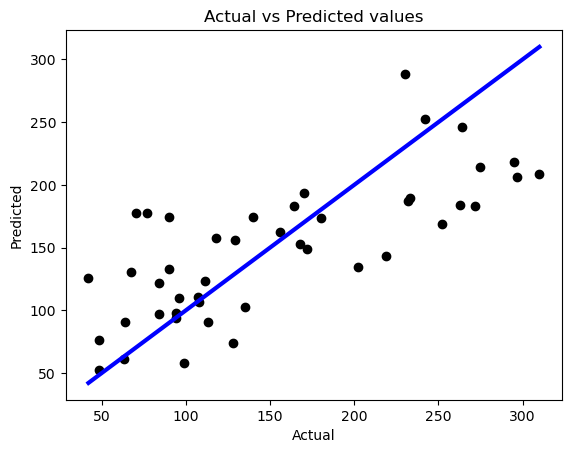

In [111]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.1, random_state=42)

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
predictions = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)
# R2 score
print(f"R2 Score: {model.score(X_test, y_test)}")

# Plot actual vs predicted values for the target variable
plt.scatter(y_test, predictions, color="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", linewidth=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()

---

### *Example 4: Linear Regression*

In the following example the dataset is created by generating 30 random, sorted input values between 0 and 1.

For each input value, the true target is computed using a cosine function scaled by 1.5 \pi. 

To simulate real-world data, Gaussian noise with a standard deviation of 0.1 is added to these target values. This results in a dataset where the true underlying pattern is a cosine wave with some random noise.

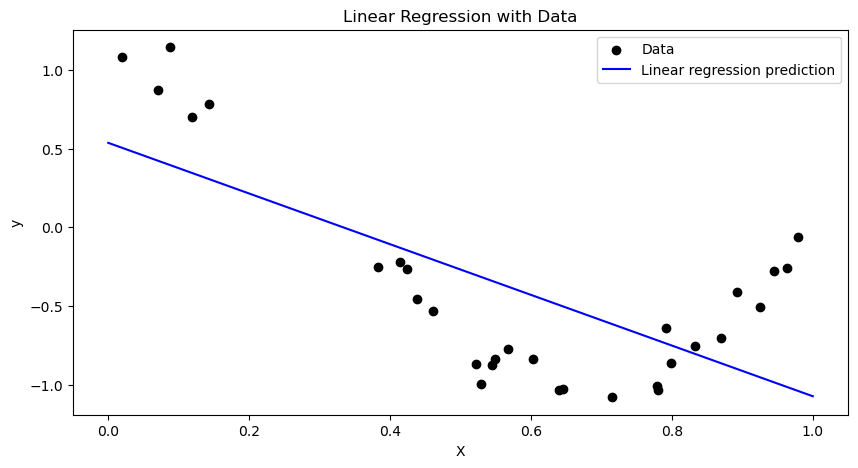

R2 Score: 0.4736796287494851


In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

model = LinearRegression()
    
model.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = model.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = model.score(X[:, np.newaxis], y)
print("R2 Score:", score)

- While the model makes some accurate predictions near the center where the data is less curved, it performs poorly at the extremes.
- This kind of model may work well for some linear relationships, but for complex patterns, a more flexible model (like polynomial regression) might be better.

---

## Introducing `Pipeline` in `Scikit-learn`

**What is a Pipeline?**

In machine learning, a pipeline helps streamline the process of transforming data and training models by combining multiple steps into a single object.

A pipeline ensures that these steps are executed in the correct order and can be treated as a single unit, which is especially useful for cross-validation and grid search.

**A typical pipeline includes:**

- Data preprocessing steps (e.g., scaling, encoding, feature extraction)
- Model training (e.g., linear regression, decision trees)

**Key Advantages of Using Pipelines:**

- Simplifies Workflow: A pipeline combines various steps (data transformation, model training) into a single object. This makes it easier to handle complex workflows.
- Prevents Data Leakage: By ensuring that data transformations are applied only to training data during cross-validation, pipelines help avoid data leakage, which can lead to overly optimistic performance estimates.
- Hyperparameter Tuning: Pipelines make it easier to search over a range of hyperparameters, including those related to preprocessing and model training, using tools like GridSearchCV or RandomizedSearchCV.

A scikit-learn pipeline is constructed as a sequence of steps.

Each step except the last must be a transformer (i.e., an object that implements the fit and transform methods), and the last step must be an estimator (i.e., an object that implements the fit and predict methods).

### Pipeline Examples
#### Simple Pipeline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
    ("preprocessing", StandardScaler()),
    ("classifier", LinearRegression()),
]
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', LinearRegression())])

#### Setting Config for Displaying Pipelines

In [3]:
from sklearn import set_config

set_config(display="text")
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', LinearRegression())])

#### Adding An Element to Pipeline

In [6]:
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

set_config(display="diagram")

steps = [
    ("standard_scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=3)),
    ("classifier", LinearRegression()),
]
    
pipe = Pipeline(steps)
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('classifier', LinearRegression())])

The `make_pipeline` function in scikit-learn is a shorthand for creating a pipeline without needing to name each step explicitly, automatically assigning names based on the estimators provided, making the code more concise.

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### You Can Create More Complex Pipelines

In [7]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["state", "gender"]),
        ("numerical", numeric_preprocessor, ["age", "weight"]),
    ]
)

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'gender']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

---

### *Example 5: Extending Linear Regression with Polynomial Features*

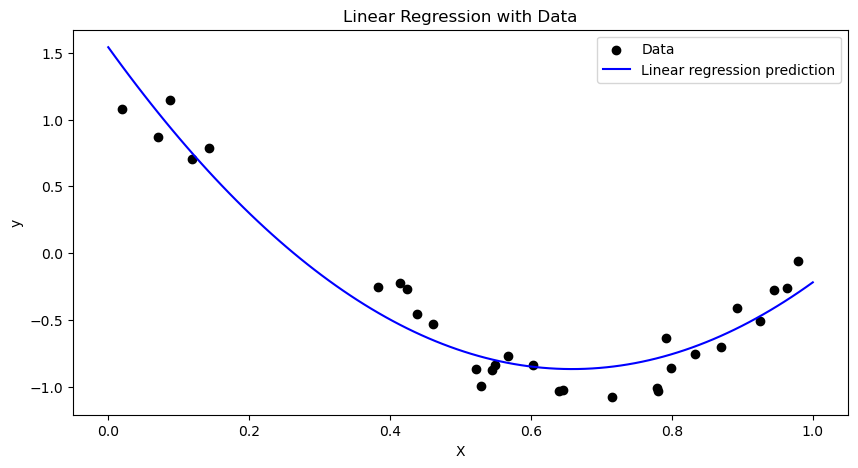

R2 Score: 0.93080078598832


In [9]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
    
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
    
    
pipeline.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = pipeline.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = pipeline.score(X[:, np.newaxis], y)
print("R2 Score:", score)

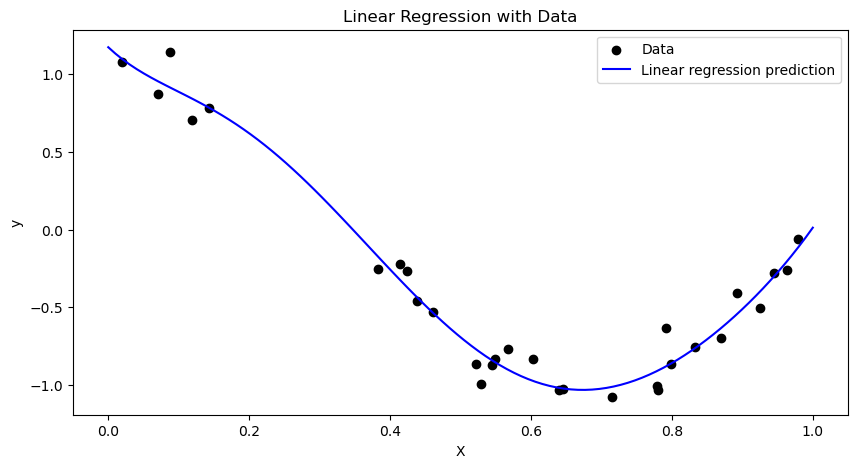

R2 Score: 0.9747297712132054


In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=6, include_bias=False)
linear_regression = LinearRegression()
    
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
    
    
pipeline.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = pipeline.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = pipeline.score(X[:, np.newaxis], y)
print("R2 Score:", score)

### Classical Linear Regressors

| Regressor | Description |
|-----------|-------------|
| [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) | Ordinary least squares Linear Regression. |
| [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) | Linear least squares with l2 regularization. |
| [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) | Ridge regression with built-in cross-validation. |
| [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) | Linear model fitted by minimizing a regularized empirical loss with SGD. |

### Regressors with Variable Selection

| Regressor | Description |
|-----------|-------------|
| [`ElasticNet`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.ElasticNet.html) | Linear regression with combined L1 and L2 priors as regularizer. |
| [`ElasticNetCV`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.ElasticNetCV.html) | Elastic Net model with iterative fitting along a regularization path. |
| [`Lars`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.Lars.html) | Least Angle Regression model (LARS). |
| [`LarsCV`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.LarsCV.html) | Cross-validated Least Angle Regression model. |
| [`Lasso`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.Lasso.html) | Linear model trained with L1 prior as regularizer (aka the Lasso). |
| [`LassoCV`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.LassoCV.html) | Lasso linear model with iterative fitting along a regularization path. |
| [`LassoLars`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.LassoLars.html) | Lasso model fit with Least Angle Regression (LARS). |
| [`LassoLarsCV`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.LassoLarsCV.html) | Cross-validated Lasso, using the LARS algorithm. |
| [`LassoLarsIC`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.LassoLarsIC.html) | Lasso model fit with LARS using BIC or AIC for model selection. |
| [`OrthogonalMatchingPursuit`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html) | Orthogonal Matching Pursuit model (OMP). |
| [`OrthogonalMatchingPursuitCV`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.OrthogonalMatchingPursuitCV.html) | Cross-validated Orthogonal Matching Pursuit model (OMP). |

### Linear Classifiers

| Classifier | Description |
|------------|-------------|
| [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) | Logistic Regression (aka logit, MaxEnt) classifier. |
| [`LogisticRegressionCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) | Logistic Regression CV (aka logit, MaxEnt) classifier. |
| [`PassiveAggressiveClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html) | Passive Aggressive Classifier. |
| [`Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) | Linear perceptron classifier. |
| [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) | Classifier using Ridge regression. |
| [`RidgeClassifierCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html) | Ridge classifier with built-in cross-validation. |
| [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) | Linear classifiers (SVM, logistic regression, etc.) with SGD training. |
| [`SGDOneClassSVM`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html) | Solves linear One-Class SVM using Stochastic Gradient Descent. |

### Bayesian Regressors

| Regressor | Description |
|-----------|-------------|
| [`ARDRegression`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.ARDRegression.html) | Bayesian ARD regression. |
| [`BayesianRidge`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.BayesianRidge.html) | Bayesian ridge regression. |

### Multi-task Linear Regressors with Variable Selection

These estimators fit multiple regression problems (or tasks) jointly, while inducing sparse coefficients. While the inferred coefficients may differ between the tasks, they are constrained to agree on the features that are selected (non-zero coefficients).

| Regressor | Description |
|-----------|-------------|
| [`MultiTaskElasticNet`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.MultiTaskElasticNet.html) | Multi-task ElasticNet model trained with L1/L2 mixed-norm as regularizer. |
| [`MultiTaskElasticNetCV`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.MultiTaskElasticNetCV.html) | Multi-task L1/L2 ElasticNet with built-in cross-validation. |
| [`MultiTaskLasso`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.MultiTaskLasso.html) | Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer. |
| [`MultiTaskLassoCV`](https://scikit-learn.org/stable/api/sklearn.linear_model.html../modules/generated/sklearn.linear_model.MultiTaskLassoCV.html) | Multi-task Lasso model with built-in cross-validation. |

and there are MORE models.

Further methods of scikit-learn and meachine learning techniques will be introduced in the following notebooks. These will cover essential aspects such as feature scaling, model selection, cross-validation, and advanced algorithms like decision trees, support vector machines, and ensemble methods. 

As we progress, you will learn how to effectively apply scikit-learn's powerful tools to build, evaluate, and fine-tune machine learning models for a variety of tasks.